# EDA
In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the load_dataset method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon.

### a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

In [4]:
import seaborn as sns

df = sns.load_dataset("mpg")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df[df["horsepower"].isna()]

In [25]:
import pandas as pd
# group by displacement to get median horsepower
median_hp = df.groupby("displacement")["horsepower"].median()

# fill null values with median hp by displacement
df["horsepower"] = df.apply(
    lambda row: median_hp[row["displacement"]] if pd.isna(row["horsepower"]) else row["horsepower"],
    axis=1
)
df["horsepower"].isna().sum()

np.int64(1)

In [32]:
# fill null values of single displacement values with median hp
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

In [35]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### b) Use describe only on those columns that are relevant to get statistical information from.

In [48]:
df[["mpg", "displacement", "horsepower", "weight", "acceleration", "model_year"]].describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
mpg,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
displacement,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,104.125628,38.321447,46.0,75.000,92.0,125.000,230.0
weight,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


### c) Make some plots on some of the columns that you find interesting.

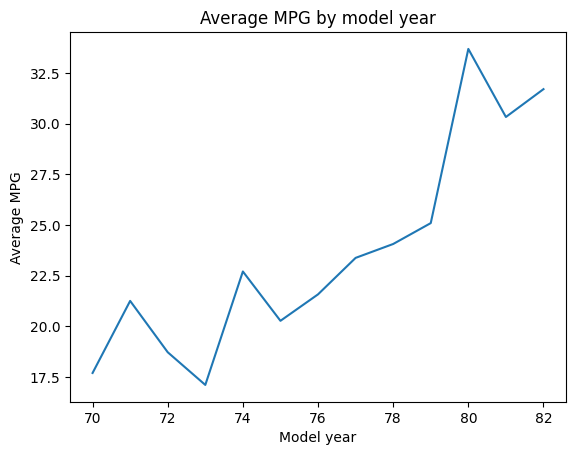

In [46]:
# plot average mpg by horsepower
df_hp = df.groupby("model_year")["mpg"].mean().reset_index()
ax = df_hp.plot(x="model_year", y="mpg", legend=False)
ax.set(title="Average MPG by model year", xlabel="Model year", ylabel="Average MPG");

C:\Users\andre\AppData\Local\Temp\ipykernel_15412\3878385933.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_weight = df.groupby("weight_bin")["mpg"].mean().reset_index()


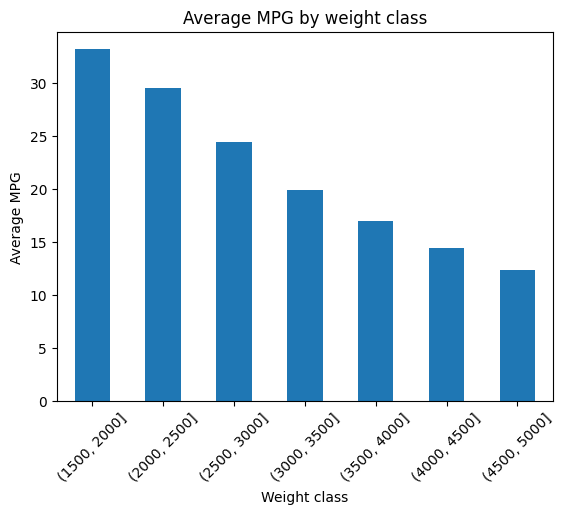

In [69]:
# average MPG by weight class

# create weight classes (bins)
bins = range(1500, 5500, 500)
df["weight_bin"] = pd.cut(df["weight"], bins=bins)

df_weight = df.groupby("weight_bin")["mpg"].mean().reset_index()
ax = df_weight.plot(kind="bar", x="weight_bin", y="mpg", legend=False, rot=45)
ax.set(title="Average MPG by weight class", xlabel="Weight class", ylabel="Average MPG");


### d) Check if there are any columns you might want to drop.

In [72]:
# columns to drop for use in linear regression
df.drop(["name", "origin", "weight_bin"], axis=1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82
